In [65]:
import pandas as pd
import numpy as np
import networkx as nx
import plotly.graph_objects as go
import matplotlib.pyplot as mpl
from ast import literal_eval
from collections import Counter
from ipysigma import Sigma

# PSYOP Twitter Experiment

## Team Communities
 - 11th Cyber Battalion
 - G39

In [66]:

df = pd.concat(map(pd.read_csv, ["August_Twitter.csv","July_to_August_Twitter.csv", "May_to_July_Twitter.csv"]))

names = ['norm.author','meta.author_original','meta.tweet_type']
df2 = pd.DataFrame(df[names])
df3 = df2.dropna()

retweet = list()
for item in df3.iloc:
    if item['meta.tweet_type'] != "Original":
        retweet.append({'source': item['norm.author'], "original_poster":item['meta.author_original']})    
new_list = sorted(retweet, key=lambda x:x["source"])


retweet_df = pd.DataFrame(new_list)
retweet_sorted = pd.DataFrame(np.sort(retweet_df.values, axis = 1), columns = retweet_df.columns)
retweet_sorted["value"] = 1
retweet_sorted = retweet_sorted.groupby(["source","original_poster"], sort=False, as_index=False).sum()
new = retweet_sorted.sort_values(by="value", ascending=False)
new_filtered = new[new['value'] > 1]


G = nx.from_pandas_edgelist(new_filtered, source = "source", target="original_poster", edge_attr="value", create_using=nx.Graph())

degree = nx.degree_centrality(G)

## Breakdown of Tweets

Most of the Tweets are retweets from another user. Meaning a user shared a posting from another user. The next highest is replies, where one user would mention another in a reply either from the original tweet or in the comments. Lastly, the original tweets are tweets that are initial tweets from a user.

In [67]:
get_percentage_of_post(df)

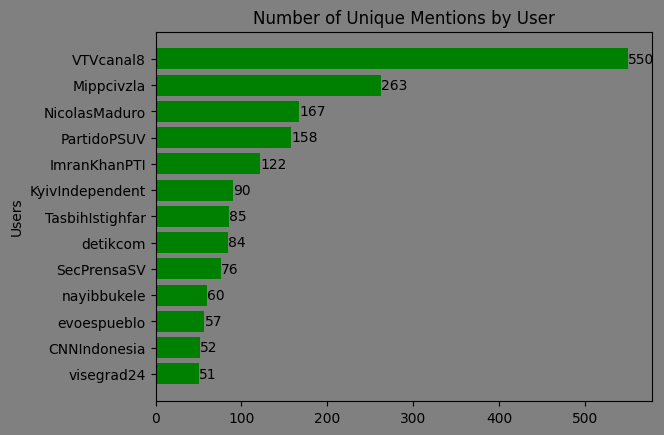

In [75]:
big_influence = dict(G.degree())
big_influence = {k:v for k,v in big_influence.items() if v > 50}
nodes = list([node for node,degree in dict(big_influence).items()])
degree = list([degree for node,degree in dict(big_influence).items()])
value = [v for k, v in sorted(big_influence.items(), key=lambda item: item[1])]
key = [k for k, v in sorted(big_influence.items(), key=lambda item: item[1])]

fig, ax = mpl.subplots()
bars = ax.barh(key, value,color='green')
fig.set_facecolor('Grey')
ax.set_facecolor('Grey')
ax.set_ylabel('Users',color='Black')
ax.set_title('Number of Unique Mentions by User')
ax.bar_label(bars)
mpl.show()


## Number of unique mentions by user

This represents how many times a User has interacted with another unique User. 

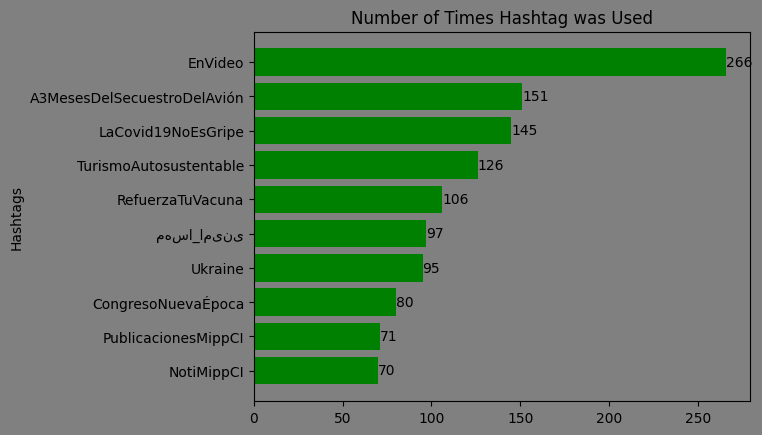

In [71]:

df = pd.concat(map(pd.read_csv, ["August_Twitter.csv", "July_to_August_Twitter.csv","May_to_July_Twitter.csv"]), ignore_index=True)
df.columns
hashlst = []
df['meta.hashtag'] = df['meta.hashtag'].dropna()
fdmh = df['meta.hashtag']
tophashlist = []



for item in df['meta.hashtag']:
    if not pd.isna(item):
        new = ""
        for x in item:
            new += x
        words = new.split(",")
        for string in words:
            string = string.replace('[','')
            string = string.replace(']','')
            string = string.replace("'","")
            string = string.replace(' ','')
            hashlst.append(string)

pd.set_option("display.max_rows", None)
uni = pd.Series(hashlst).value_counts()
topten = pd.Series(hashlst).dropna().value_counts().head(10)
topten = dict(topten.items())

value = [v for k, v in sorted(topten.items(), key=lambda item: item[1])]
key = [k for k, v in sorted(topten.items(), key=lambda item: item[1])]

fig, ax = mpl.subplots()
bars = ax.barh(key, value,color='green')
fig.set_facecolor('Grey')
ax.set_facecolor('Grey')
ax.set_ylabel('Hashtags',color='Black')
ax.set_title('Number of Times Hashtag was Used')
ax.bar_label(bars)
mpl.show()


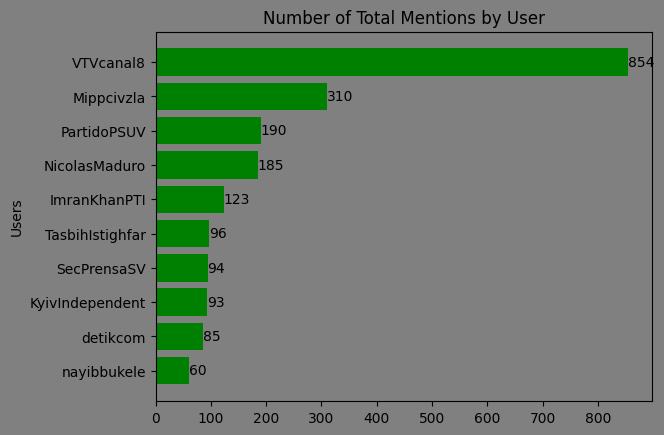

In [76]:
import pandas as pd

df = pd.concat(map(pd.read_csv, ["August_Twitter.csv", "July_to_August_Twitter.csv","May_to_July_Twitter.csv"]), ignore_index=True)
df.columns
hashlst = []
df['meta.author_original'] = df['meta.author_original'].dropna()
fdmh = df['meta.author_original']
tophashlist = []



for item in df['meta.author_original']:
    if not pd.isna(item):
        new = ""
        for x in item:
            new += x
        words = new.split(",")
        for string in words:
            string = string.replace('[','')
            string = string.replace(']','')
            string = string.replace("'","")
            string = string.replace(' ','')
            hashlst.append(string)

pd.set_option("display.max_rows", None)
uni = pd.Series(hashlst).value_counts()
topten = pd.Series(hashlst).dropna().value_counts().head(10)
topten = dict(topten.items())

value = [v for k, v in sorted(topten.items(), key=lambda item: item[1])]
key = [k for k, v in sorted(topten.items(), key=lambda item: item[1])]

fig, ax = mpl.subplots()
bars = ax.barh(key, value,color='green')
fig.set_facecolor('Grey')
ax.set_facecolor('Grey')
ax.set_ylabel('Users',color='Black')
ax.set_title('Number of Total Mentions by User')
ax.bar_label(bars)
mpl.show()

In [73]:
def get_percentage_of_post(df):
    
    df_count = {"Reply": 0, "Retweet" : 0, "Original" : 0, "Quote": 0}
    #group_df = df.groupby("meta.tweet_type")
   # df = pd.DataFrame(group_df)
    #df.to_csv("csv.csv")
    for name in df.iloc:
        df_count[name['meta.tweet_type']] +=1
        
    new_df = pd.DataFrame.from_dict(df_count, orient='index', columns=['Count'])
    new_df = new_df.sort_values(by='Count', ascending=False)
    fig = go.Figure(data=[go.Bar(x=new_df.index, y=new_df['Count'])])
    
    fig.update_layout(
    title="Tweet Types",
    xaxis_title="Tweet Type",
    yaxis_title="Count",
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=True, gridcolor='lightgray'),
    plot_bgcolor='white',
    )
 
    fig.show()

In [74]:
df.describe()
sorenson_df = df.dropna(subset=['meta.author_original', 'norm.author'])
df_filtered = sorenson_df[df['meta.author_original'] != 'NaN']
df_filtered = df_filtered[df_filtered['norm.author'] != 'NaN']

df_filtered['weight'] = df_filtered.groupby(['meta.author_original', 'norm.author'])['meta.author_original'].transform('size')

G = nx.from_pandas_edgelist(df_filtered, 'meta.author_original', 'norm.author',
                            create_using=nx.DiGraph(), edge_attr='weight')
G.remove_edges_from(nx.selfloop_edges(G))
G.remove_nodes_from(list(nx.isolates(G)))
G.edges(data=True)
Sigma(G,node_size= G.degree)

C:\Users\conno\AppData\Local\Temp\ipykernel_16448\370256690.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Sigma(nx.DiGraph with 13,910 nodes and 9,818 edges)

In [88]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# download nltk corpus
import nltk
nltk.download('all')

# Load the amazon review dataset
df = pd.concat(map(pd.read_csv, ["August_Twitter.csv", "July_to_August_Twitter.csv","May_to_July_Twitter.csv"]), ignore_index=True)
df.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\conno\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\conno\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\conno\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\conno\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\conno\AppData\Roaming\nltk_data...
[nltk_data]    | 

,Unnamed: 0,doc.coordinates,doc.created_at,doc.derived,doc.derived_from_id_str,doc.display_text_range,doc.entities,doc.extended_tweet,doc.favorite_count,doc.favorited,...,meta.telegram_channel,meta.tweet_type,meta.username,norm.author,norm.body,norm.domain,norm.id,norm.timestamp,norm.url,meta.email
0,0,NaN,2022-09-12T00:00:01Z,NaN,NaN,"[0, 140]",{'urls': [{'display_url': 'pulsoguayaco.blogsp...,{'extended_entities': {'media': {'display_url'...,0,False,...,NaN,Original,NaN,pulsoguayaco,Qatar 2022: Diez atractivos turísticos de la s...,twitter.com,1569113567583907840,2022-09-12T00:00:01Z,https://twitter.com/pulsoguayaco/status/156911...,NaN
1,1,NaN,2022-09-12T00:00:09Z,NaN,NaN,NaN,{'urls': {'display_url': 'twitter.com/i/web/st...,NaN,0,False,...,NaN,Retweet,IntelCrab,rogerm52,And there you have it. Confirmation of #Strile...,twitter.com,1569113598009409537,2022-09-12T00:00:09Z,https://twitter.com/rogerm52/status/1569113598...,NaN
2,2,NaN,2022-09-12T00:00:18Z,NaN,NaN,NaN,{'urls': {'display_url': 'twitter.com/i/web/st...,NaN,0,False,...,NaN,Retweet,VTVcanal8,franc73143668,#PREVENCIÓN😷| Prevenir es tarea de todos. Sin ...,twitter.com,1569113638367293440,2022-09-12T00:00:18Z,https://twitter.com/franc73143668/status/15691...,NaN
3,3,NaN,2022-09-12T00:00:30Z,NaN,NaN,NaN,{'urls': {'display_url': 'twitter.com/i/web/st...,NaN,0,False,...,NaN,Retweet,KyivIndependent,RickThurman7,⚡️US official: Ukraine should decide how to li...,twitter.com,1569113686018490368,2022-09-12T00:00:30Z,https://twitter.com/RickThurman7/status/156911...,NaN
4,4,NaN,2022-09-12T00:00:30Z,NaN,NaN,"[0, 140]",{'urls': {'display_url': 'twitter.com/i/web/st...,{'extended_entities': {'media': {'display_url'...,0,False,...,NaN,Original,NaN,julian14117029,Kementerian PUPR gagas jalan Trans Papua Ruas ...,twitter.com,1569113686316285952,2022-09-12T00:00:30Z,https://twitter.com/julian14117029/status/1569...,NaN


In [89]:

def preprocess_text(text):
    
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

df['norm.body'] = df['norm.body'].apply(preprocess_text)
df.head()

,Unnamed: 0,doc.coordinates,doc.created_at,doc.derived,doc.derived_from_id_str,doc.display_text_range,doc.entities,doc.extended_tweet,doc.favorite_count,doc.favorited,...,meta.telegram_channel,meta.tweet_type,meta.username,norm.author,norm.body,norm.domain,norm.id,norm.timestamp,norm.url,meta.email
0,0,NaN,2022-09-12T00:00:01Z,NaN,NaN,"[0, 140]",{'urls': [{'display_url': 'pulsoguayaco.blogsp...,{'extended_entities': {'media': {'display_url'...,0,False,...,NaN,Original,NaN,pulsoguayaco,qatar 2022 : diez atractivos turísticos de la ...,twitter.com,1569113567583907840,2022-09-12T00:00:01Z,https://twitter.com/pulsoguayaco/status/156911...,NaN
1,1,NaN,2022-09-12T00:00:09Z,NaN,NaN,NaN,{'urls': {'display_url': 'twitter.com/i/web/st...,NaN,0,False,...,NaN,Retweet,IntelCrab,rogerm52,. confirmation # strilecha 's liberation . ukr...,twitter.com,1569113598009409537,2022-09-12T00:00:09Z,https://twitter.com/rogerm52/status/1569113598...,NaN
2,2,NaN,2022-09-12T00:00:18Z,NaN,NaN,NaN,{'urls': {'display_url': 'twitter.com/i/web/st...,NaN,0,False,...,NaN,Retweet,VTVcanal8,franc73143668,# prevención😷| prevenir e tarea de todos . sin...,twitter.com,1569113638367293440,2022-09-12T00:00:18Z,https://twitter.com/franc73143668/status/15691...,NaN
3,3,NaN,2022-09-12T00:00:30Z,NaN,NaN,NaN,{'urls': {'display_url': 'twitter.com/i/web/st...,NaN,0,False,...,NaN,Retweet,KyivIndependent,RickThurman7,⚡️us official : ukraine decide liberate territ...,twitter.com,1569113686018490368,2022-09-12T00:00:30Z,https://twitter.com/RickThurman7/status/156911...,NaN
4,4,NaN,2022-09-12T00:00:30Z,NaN,NaN,"[0, 140]",{'urls': {'display_url': 'twitter.com/i/web/st...,{'extended_entities': {'media': {'display_url'...,0,False,...,NaN,Original,NaN,julian14117029,kementerian pupr gagas jalan trans papua ruas ...,twitter.com,1569113686316285952,2022-09-12T00:00:30Z,https://twitter.com/julian14117029/status/1569...,NaN


In [110]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

df = pd.concat(map(pd.read_csv, ["August_Twitter.csv", "July_to_August_Twitter.csv","May_to_July_Twitter.csv"]), ignore_index=True)
df.columns
hashlst = []
df['meta.hashtag'] = df['meta.hashtag'].dropna()
fdmh = df['meta.hashtag']
tophashlist = []



for item in df['meta.hashtag']:
    if not pd.isna(item):
        new = ""
        for x in item:
            new += x
        words = new.split(",")
        for string in words:
            string = string.replace('[','')
            string = string.replace(']','')
            string = string.replace("'","")
            string = string.replace(' ','')
            hashlst.append(string)

pd.set_option("display.max_rows", None)
uni = pd.Series(hashlst).value_counts()
topten = pd.Series(hashlst).dropna().value_counts().head(10)
topten = dict(topten.items())

df1 = df.concat(topten,ignore_index=True)


df1['sentiment'] = df['norm.body'].apply(get_sentiment)
df[['norm.author','sentiment']]



AttributeError: 'DataFrame' object has no attribute 'concat'